# **Experiment 3.3**
### Segment the Customers based on RFM using K-Mean so that the company can target its customers efficiently. 


## **By: Jasleen Minhas**

## **UID: 20BCS6897**

## Importing Libraries

In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import squarify   # To plot a huge amount of data
import missingno as msno  # Exploratory visualization of missing data


**Dataset Link:** https://www.kaggle.com/datasets/vijayuv/onlineretail?select=OnlineRetail.csv

## Loading Dataset

In [ ]:
df = pd.read_csv("OnlineRetail.csv", encoding= 'unicode_escape')

In [ ]:
df.shape

(49912, 8)

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49912 entries, 0 to 49911
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    49912 non-null  object 
 1   StockCode    49912 non-null  object 
 2   Description  49770 non-null  object 
 3   Quantity     49912 non-null  int64  
 4   InvoiceDate  49912 non-null  object 
 5   UnitPrice    49911 non-null  float64
 6   CustomerID   32030 non-null  float64
 7   Country      49911 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,49912.000000,49911.000000,32030.000000
mean,8.294218,6.423712,15426.016422
std,55.576019,166.653120,1752.300279
min,-9360.000000,0.000000,12347.000000
25%,1.000000,1.250000,14057.000000
50%,2.000000,2.510000,15464.000000
75%,8.000000,4.250000,17041.000000
max,2880.000000,16888.020000,18283.000000


# **DATA CLEANING**

### Looking for Any Null Values 

In [ ]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      142
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     17882
Country            1
dtype: int64

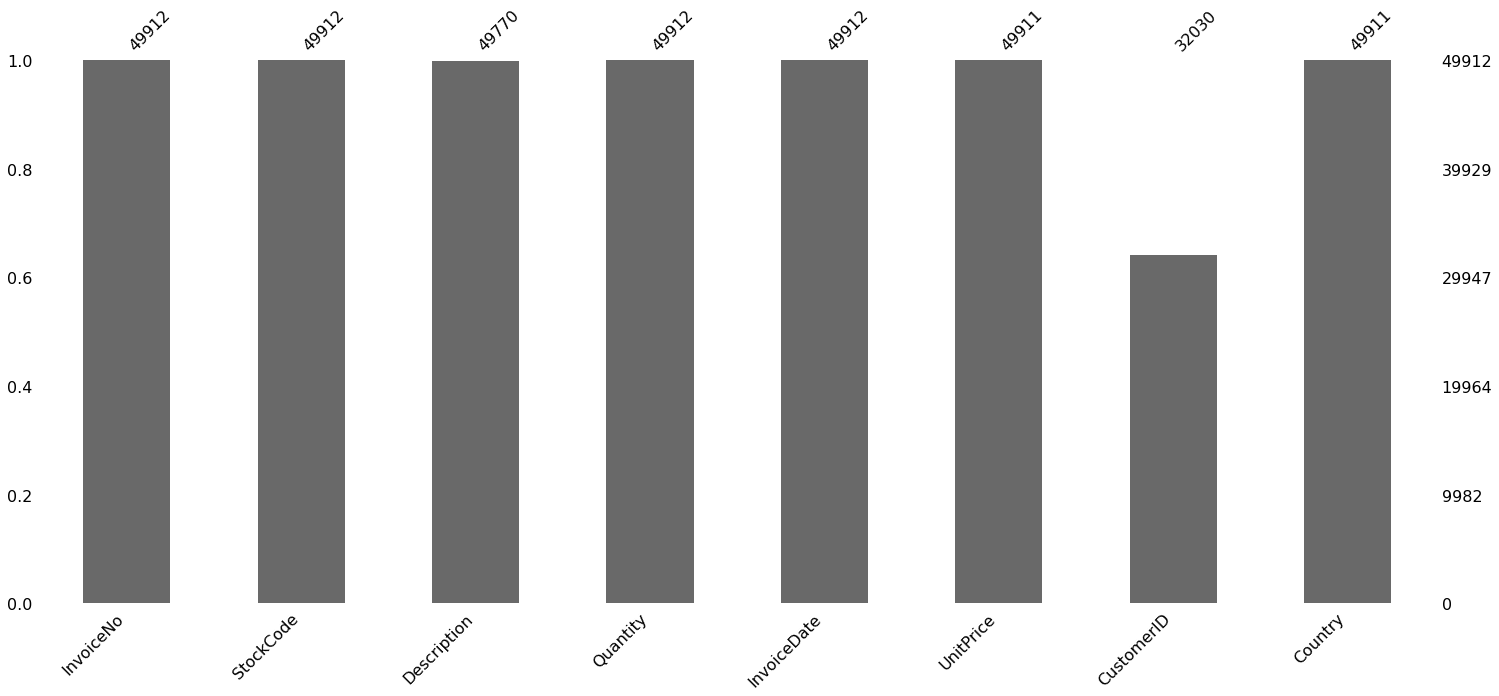

In [ ]:
msno.bar(df)

### Dropping Rows if any column having Null values

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(32030, 8)

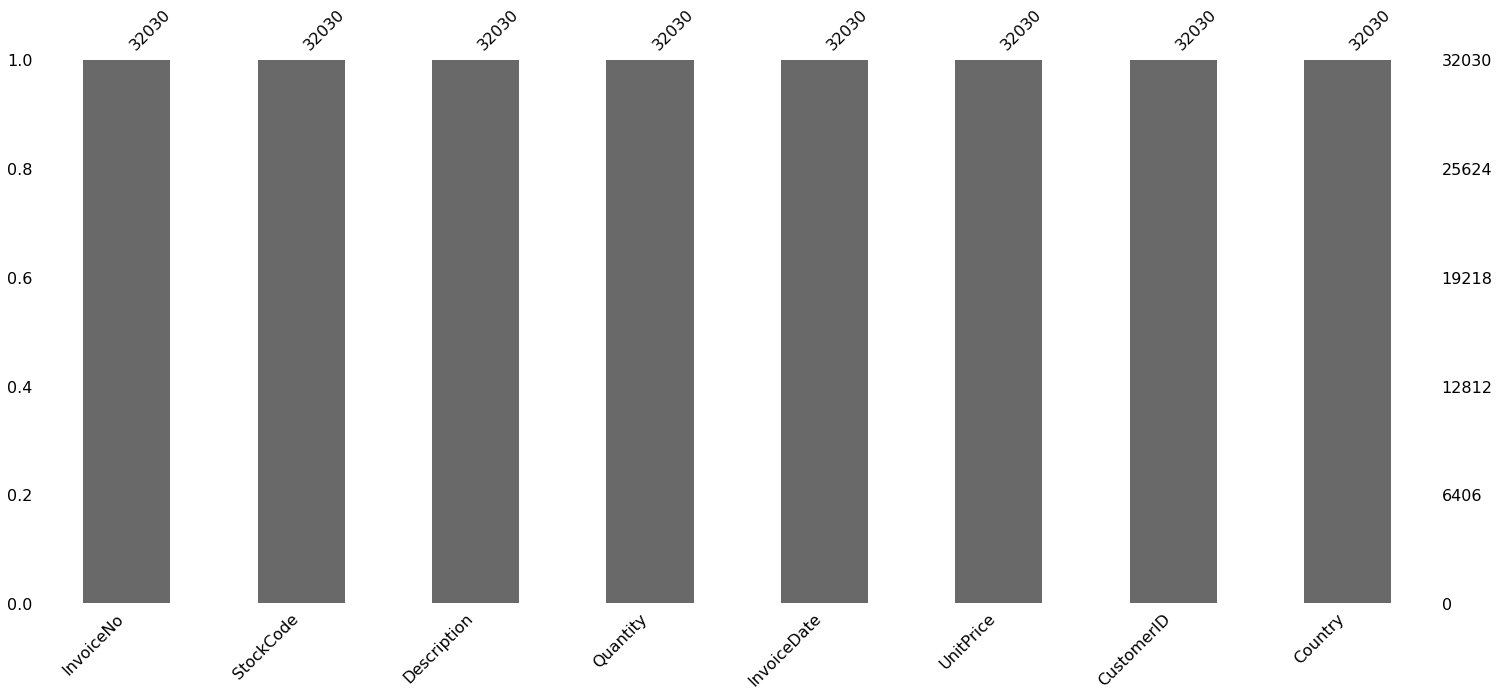

In [ ]:
msno.bar(df)

### Verifying Quantity must be Greater than Zero 

In [ ]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
49856,C540535,85023B,EAU DE NILE JEWELLED PHOTOFRAME,-1,1/9/2011 14:17,2.55,15005.0,United Kingdom
49857,C540535,21232,STRAWBERRY CERAMIC TRINKET BOX,-1,1/9/2011 14:17,1.25,15005.0,United Kingdom
49858,C540535,21232,STRAWBERRY CERAMIC TRINKET BOX,-1,1/9/2011 14:17,1.25,15005.0,United Kingdom
49859,C540535,20681,PINK POLKADOT CHILDRENS UMBRELLA,-1,1/9/2011 14:17,3.25,15005.0,United Kingdom


### Dropping Rows in which Quantity < 0

In [ ]:
df.drop(df[df['Quantity'] <= 0].index,inplace=True)

In [ ]:
df.shape

(31150, 8)

### Dropping Rows in which Unit Price < 0

In [ ]:
df.drop(df[df['UnitPrice'] <= 0].index,inplace=True)

In [ ]:
df.shape

(31145, 8)

### Check the Customer ID Length 

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31145 entries, 0 to 49910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    31145 non-null  object 
 1   StockCode    31145 non-null  object 
 2   Description  31145 non-null  object 
 3   Quantity     31145 non-null  int64  
 4   InvoiceDate  31145 non-null  object 
 5   UnitPrice    31145 non-null  float64
 6   CustomerID   31145 non-null  object 
 7   Country      31145 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
df['CustomerID'].dtype

dtype('O')

In [ ]:
for i in df['CustomerID']:
    if len(i) !=5:
        print(i)
print("CustomerID is fine")


CustomerID is fine


**Interence**:
CustomerID length is 5 for all and its fine

### Checking Duplicates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31145 entries, 0 to 49910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    31145 non-null  object 
 1   StockCode    31145 non-null  object 
 2   Description  31145 non-null  object 
 3   Quantity     31145 non-null  int64  
 4   InvoiceDate  31145 non-null  object 
 5   UnitPrice    31145 non-null  float64
 6   CustomerID   31145 non-null  object 
 7   Country      31145 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
duplicate = df[df.duplicated('InvoiceNo')] 
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
...,...,...,...,...,...,...,...,...
49906,540538,47422,ASSORTED MONKEY SUCTION CUP HOOK,1,1/9/2011 14:36,0.42,17841,United Kingdom
49907,540538,47422,ASSORTED MONKEY SUCTION CUP HOOK,5,1/9/2011 14:36,0.42,17841,United Kingdom
49908,540538,21976,PACK OF 60 MUSHROOM CAKE CASES,9,1/9/2011 14:36,0.55,17841,United Kingdom
49909,540538,84991,60 TEATIME FAIRY CAKE CASES,5,1/9/2011 14:36,0.55,17841,United Kingdom


**The Invoice Number seems to be same but the Stock Codes are different. So this will not be considered as Duplicates.**

### Verify Invoice Number

In [ ]:
df['InvoiceNo'].count()

31145

In [ ]:
df['InvoiceNo'].dtypes

dtype('O')

# Statistical Data Analysis

In [ ]:
df.describe()

,Quantity,UnitPrice
count,31145.000000,31145.000000
mean,12.224049,3.117903
std,44.100494,4.976158
min,1.000000,0.070000
25%,2.000000,1.250000
50%,4.000000,2.100000
75%,12.000000,3.750000
max,2880.000000,295.000000


In [ ]:
df[df.Quantity == df.Quantity.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754,United Kingdom


In [ ]:
df[df.Quantity == df.Quantity.min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,536381,71270,PHOTO CLIP LINE,1,12/1/2010 9:41,1.25,15311,United Kingdom
114,536381,22262,FELT EGG COSY CHICKEN,1,12/1/2010 9:41,0.85,15311,United Kingdom
115,536381,22637,PIGGY BANK RETROSPOT,1,12/1/2010 9:41,2.55,15311,United Kingdom
118,536381,21166,COOK WITH WINE METAL SIGN,1,12/1/2010 9:41,1.95,15311,United Kingdom
120,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,12/1/2010 9:41,2.95,15311,United Kingdom
...,...,...,...,...,...,...,...,...
49887,540537,20772,GARDEN PATH JOURNAL,1,1/9/2011 14:28,2.55,13565,United Kingdom
49890,540537,79066K,RETRO MOD TRAY,1,1/9/2011 14:28,0.85,13565,United Kingdom
49904,540538,72801G,4 BURGUNDY WINE DINNER CANDLES,1,1/9/2011 14:36,1.25,17841,United Kingdom
49906,540538,47422,ASSORTED MONKEY SUCTION CUP HOOK,1,1/9/2011 14:36,0.42,17841,United Kingdom


In [ ]:
df[df.UnitPrice == df.UnitPrice.min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14788,537618,17038,PORCELAIN BUDAH INCENSE HOLDER,100,12/7/2010 13:50,0.07,15061,United Kingdom


In [ ]:
df[df.UnitPrice == df.UnitPrice.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,12/2/2010 18:06,295.0,13145,United Kingdom
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,12/16/2010 8:41,295.0,16607,United Kingdom


In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria'], dtype=object)

In [ ]:
df['Country'].value_counts()

United Kingdom     28360
Germany              740
France               600
EIRE                 333
Spain                173
Norway               147
Portugal             133
Belgium               95
Cyprus                83
Australia             80
Netherlands           72
Japan                 65
Switzerland           49
Italy                 40
Sweden                39
Lithuania             35
Iceland               31
Denmark               20
Channel Islands       17
Finland               17
Poland                 8
Austria                8
Name: Country, dtype: int64

In [ ]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    251
REGENCY CAKESTAND 3 TIER              166
HAND WARMER BABUSHKA DESIGN           153
SCOTTIE DOG HOT WATER BOTTLE          142
PAPER CHAIN KIT 50'S CHRISTMAS        141
                                     ... 
PAINTED PINK RABBIT                     1
SET OF 3 PINK FLYING DUCKS              1
FRUIT TREE AND BIRDS WALL PLAQUE        1
TALL ROCOCO CANDLE HOLDER               1
LARGE CIRCULAR MIRROR MOBILE            1
Name: Description, Length: 2490, dtype: int64

## Getting the Highest Quantity Countrywise

In [ ]:
gb = df.groupby('Country').Quantity.max()

In [ ]:
gb

Country
Australia           576
Austria              12
Belgium             120
Channel Islands      24
Cyprus               96
Denmark             120
EIRE               1440
Finland             144
France              192
Germany             100
Iceland              36
Italy                24
Japan              1488
Lithuania            48
Netherlands         300
Norway               96
Poland               32
Portugal             40
Spain               100
Sweden              576
Switzerland          36
United Kingdom     2880
Name: Quantity, dtype: int64

Country with maximum customers: **United Knigdom**

# **VISUALISATION**

### Finding Numerical Variables

In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [ ]:
numerical_variables = [feature for feature in df.columns if (df[feature].dtypes != 'O' and df[feature].dtypes !='<M8[ns]')]
numerical_variables

['Quantity', 'UnitPrice']

# Create New Feature Year from Invoice Date

In [ ]:
df['InvoiceDate']

0        12/1/2010 8:26
1        12/1/2010 8:26
2        12/1/2010 8:26
3        12/1/2010 8:26
4        12/1/2010 8:26
              ...      
49906    1/9/2011 14:36
49907    1/9/2011 14:36
49908    1/9/2011 14:36
49909    1/9/2011 14:36
49910    1/9/2011 14:36
Name: InvoiceDate, Length: 31145, dtype: object

In [ ]:
df['YearOfSale'] = pd.DatetimeIndex(df['InvoiceDate']).year
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...
49906,540538,47422,ASSORTED MONKEY SUCTION CUP HOOK,1,1/9/2011 14:36,0.42,17841,United Kingdom,2011
49907,540538,47422,ASSORTED MONKEY SUCTION CUP HOOK,5,1/9/2011 14:36,0.42,17841,United Kingdom,2011
49908,540538,21976,PACK OF 60 MUSHROOM CAKE CASES,9,1/9/2011 14:36,0.55,17841,United Kingdom,2011
49909,540538,84991,60 TEATIME FAIRY CAKE CASES,5,1/9/2011 14:36,0.55,17841,United Kingdom,2011


# Finding Correlation

In [ ]:
df_corr = df[numerical_variables].corr()

In [ ]:
df_corr

,Quantity,UnitPrice
Quantity,1.000000,-0.073547
UnitPrice,-0.073547,1.000000


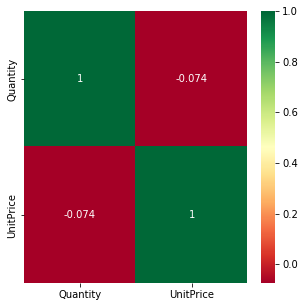

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
heat_map = sns.heatmap(df_corr,annot=True,cmap="RdYlGn",ax=ax)

# **Plots to get the Statistical Data Analysis**

# Fetch Top 5 Countries Quantity wise Data 

In [ ]:
df.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)[:5]

Country
United Kingdom    325755
Germany             9535
France              6841
Netherlands         6811
Australia           5269
Name: Quantity, dtype: int64

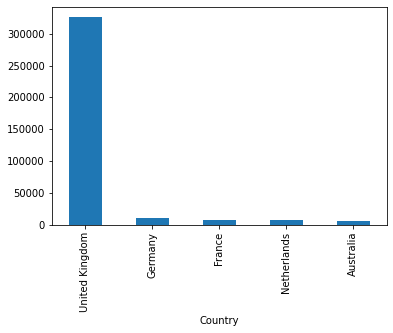

In [ ]:
df.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)[:5].plot(kind='bar')

# Quantity Sales of Year

In [ ]:
df['YearOfSale'].unique()

array([2010, 2011])

In [ ]:
df.groupby(['YearOfSale'])['Quantity'].sum()

YearOfSale
2010    312265
2011     68453
Name: Quantity, dtype: int64

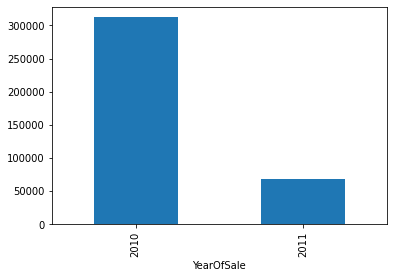

In [ ]:
df.groupby(['YearOfSale'])['Quantity'].sum().plot(kind='bar')

# Total unitprice sold by year

In [ ]:
df.groupby(['YearOfSale'])['UnitPrice'].sum()

YearOfSale
2010    81935.61
2011    15171.48
Name: UnitPrice, dtype: float64

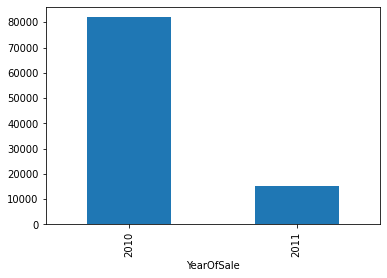

In [ ]:
df.groupby(['YearOfSale'])['UnitPrice'].sum().plot(kind='bar')

# Total quantity sold by invoiceno [Top 10]

In [ ]:
df.groupby(['InvoiceNo'])['Quantity'].sum().sort_values(ascending=False)[:10]

InvoiceNo
539731    6668
539101    4800
540267    4662
536830    4280
538991    3944
539338    3714
537659    3689
539578    3600
536783    2909
539307    2856
Name: Quantity, dtype: int64

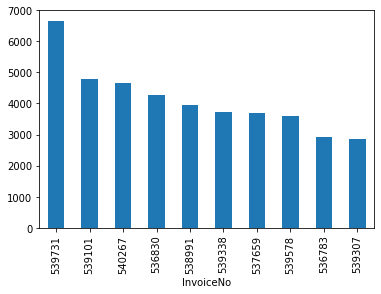

In [ ]:
df.groupby(['InvoiceNo'])['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

# **RFM Analysis**

What is RFM?

RFM is an acronym of **recency, frequency and monetary**

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase
FREQUENCY (F): Total number of purchases
MONETARY VALUE (M): Total money this customer spent.


In [ ]:
df['InvoiceDate']

0        12/1/2010 8:26
1        12/1/2010 8:26
2        12/1/2010 8:26
3        12/1/2010 8:26
4        12/1/2010 8:26
              ...      
49906    1/9/2011 14:36
49907    1/9/2011 14:36
49908    1/9/2011 14:36
49909    1/9/2011 14:36
49910    1/9/2011 14:36
Name: InvoiceDate, Length: 31145, dtype: object

In [ ]:
df['InvoiceNo']

0        536365
1        536365
2        536365
3        536365
4        536365
          ...  
49906    540538
49907    540538
49908    540538
49909    540538
49910    540538
Name: InvoiceNo, Length: 31145, dtype: object

In [ ]:
df[['Quantity','UnitPrice']]

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
49906,1,0.42
49907,5,0.42
49908,9,0.55
49909,5,0.55


In [ ]:
df['Price'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31145 entries, 0 to 49910
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    31145 non-null  object 
 1   StockCode    31145 non-null  object 
 2   Description  31145 non-null  object 
 3   Quantity     31145 non-null  int64  
 4   InvoiceDate  31145 non-null  object 
 5   UnitPrice    31145 non-null  float64
 6   CustomerID   31145 non-null  object 
 7   Country      31145 non-null  object 
 8   YearOfSale   31145 non-null  int64  
 9   Price        31145 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.6+ MB


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010,20.34


In [ ]:
df.Country.nunique()

22

In [ ]:
df['InvoiceDate'].min()

'1/4/2011 10:00'

In [ ]:
df['InvoiceDate'].max()

'12/9/2010 9:49'

In [ ]:
Now = dt.datetime(2011,12,10)

In [ ]:
Now

datetime.datetime(2011, 12, 10, 0, 0)

In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [ ]:
df['InvoiceDate']

0       2010-12-01 08:26:00
1       2010-12-01 08:26:00
2       2010-12-01 08:26:00
3       2010-12-01 08:26:00
4       2010-12-01 08:26:00
                ...        
49906   2011-01-09 14:36:00
49907   2011-01-09 14:36:00
49908   2011-01-09 14:36:00
49909   2011-01-09 14:36:00
49910   2011-01-09 14:36:00
Name: InvoiceDate, Length: 31145, dtype: datetime64[ns]

# Create RFM Table

In [ ]:
rfmTable = df.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Now - x.max()).days,
                                         'InvoiceNo' : lambda x :len(x),'Price' : lambda x :sum(x) })

In [ ]:
rfmTable.rename(columns ={'InvoiceDate' : 'Recency', 'InvoiceNo' :'Frequency',
                          'Price':'Monetary_Value'},inplace = True)

In [ ]:
rfmTable.head()

,Recency,Frequency,Monetary_Value
CustomerID,,,
12347,367,31,711.79
12348,358,17,892.80
12370,357,91,1868.02
12377,354,43,1001.52
12383,352,37,600.72


In [ ]:
rfmTable.shape

(972, 3)

# Interpretation
Customer ID - 12347
Purchased product $711.79 with a frequency of 31 times, 367 Days ago 

# Lets Check the details of First Customer of Our RFM Table

In [ ]:
df[df['CustomerID']=='12347']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale,Price
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,2010,25.20
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,2010,17.00
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,2010,39.00
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347,Iceland,2010,23.40
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,2010,15.00
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,2010,15.00
14944,537626,22773,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,2010,15.00
14945,537626,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,2010,15.00
14946,537626,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,2010,15.00
14947,537626,22805,BLUE DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,2010,15.00


# Plot RFM Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


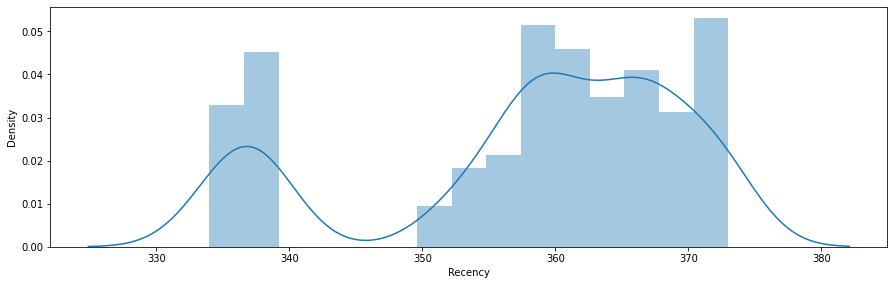

In [ ]:
plt.figure(figsize=(15,15))

# Plot Distribution of Recency
plt.subplot(3,1,1)

sns.distplot(rfmTable['Recency'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


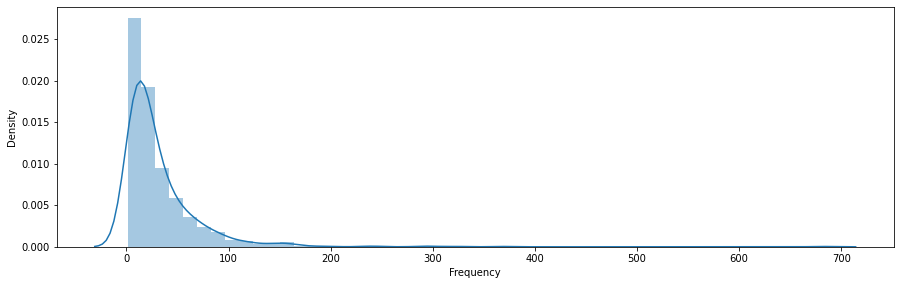

In [ ]:
plt.figure(figsize=(15,15))

# Plot Distribution of Frequency
plt.subplot(3,1,3)

sns.distplot(rfmTable['Frequency'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


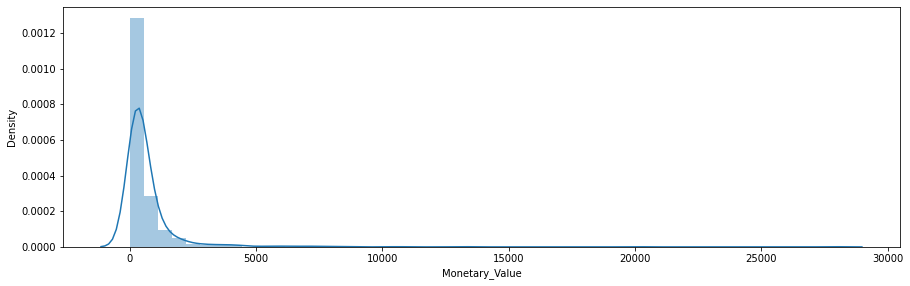

In [ ]:
plt.figure(figsize=(15,15))

# Plot Distribution of Monetary 
plt.subplot(3,1,3)

sns.distplot(rfmTable['Monetary_Value'])

plt.show()

The above graphs depicts the Data distribution.

# Calculate R and F Groups

In [ ]:
# We create a 4 labels for our labels, where 4 is the “best” quantile

r_labels = range(4,0,-1)
f_labels = range(1,5)
m_labels = range(1,5)

r_groups = pd.qcut(rfmTable['Recency'],4,r_labels)

f_groups = pd.qcut(rfmTable['Frequency'],4,f_labels)

m_groups = pd.qcut(rfmTable['Monetary_Value'],4,m_labels)

rfmTable = rfmTable.assign(R=r_groups,F=f_groups,M=m_groups)

rfmTable.head()

rfmTable.info()

rfmTable.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 972 entries, 12347 to 18283
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         972 non-null    int64   
 1   Frequency       972 non-null    int64   
 2   Monetary_Value  972 non-null    float64 
 3   R               972 non-null    category
 4   F               972 non-null    category
 5   M               972 non-null    category
dtypes: category(3), float64(1), int64(2)
memory usage: 33.6+ KB


Recency              int64
Frequency            int64
Monetary_Value     float64
R                 category
F                 category
M                 category
dtype: object

# RFM Segment & Score

#Convert Categorical to String Datatype

In [ ]:
rfmTable['R'] = rfmTable['R'].astype(str)
rfmTable['F'] = rfmTable['F'].astype(str)
rfmTable['M'] = rfmTable['M'].astype(str)

In [ ]:
rfmTable['RFM_Segment'] = rfmTable['R'].map(str) + rfmTable['F'].map(str) + rfmTable['M'].map(str)

rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment
CustomerID,,,,,,,
12347,367,31,711.79,2,3,4,234
12348,358,17,892.80,3,2,4,324
12370,357,91,1868.02,3,4,4,344
12377,354,43,1001.52,4,4,4,444
12383,352,37,600.72,4,3,3,433


In [ ]:
rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment
CustomerID,,,,,,,
12347,367,31,711.79,2,3,4,234
12348,358,17,892.80,3,2,4,324
12370,357,91,1868.02,3,4,4,344
12377,354,43,1001.52,4,4,4,444
12383,352,37,600.72,4,3,3,433


In [ ]:
rfmTable[rfmTable['RFM_Segment'] == '111'].sort_values(by='CustomerID')

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment
CustomerID,,,,,,,
12686,371,7,89.14,1,1,1,111
12791,373,2,192.60,1,1,1,111
12808,368,7,129.40,1,1,1,111
12855,372,3,38.10,1,1,1,111
13011,372,3,50.55,1,1,1,111
13305,372,5,136.20,1,1,1,111
13497,368,9,153.50,1,1,1,111
13579,369,9,164.70,1,1,1,111
13747,373,1,79.60,1,1,1,111


In [ ]:
#Count Number of Unique Segments

rfm_segment = rfmTable.groupby('RFM_Segment')['RFM_Segment']

print('The Number of Unique Segment is - ',rfm_segment.nunique().sum())
print('***********************************')
print(rfm_segment.unique())
print('***********************************')

The Number of Unique Segment is -  64
***********************************
RFM_Segment
111    [111]
112    [112]
113    [113]
114    [114]
121    [121]
       ...  
434    [434]
441    [441]
442    [442]
443    [443]
444    [444]
Name: RFM_Segment, Length: 64, dtype: object
***********************************


# RFM Score 

In [ ]:
rfmTable['R'] = rfmTable['R'].astype(int)
rfmTable['F'] = rfmTable['F'].astype(int)
rfmTable['M'] = rfmTable['M'].astype(int)

In [ ]:
rfmTable['RFM_Score'] = rfmTable[['R','F','M']].sum(axis=1)

In [ ]:
rfmTable

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347,367,31,711.79,2,3,4,234,9
12348,358,17,892.80,3,2,4,324,9
12370,357,91,1868.02,3,4,4,344,11
12377,354,43,1001.52,4,4,4,444,12
12383,352,37,600.72,4,3,3,433,10
...,...,...,...,...,...,...,...,...
18245,355,27,365.73,3,3,3,333,9
18259,366,7,376.30,2,1,3,213,6
18260,358,11,230.70,3,2,2,322,7


In [ ]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfmTable['RFM_Level'] = rfmTable.apply(rfm_level, axis=1)

rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12347,367,31,711.79,2,3,4,234,9,Can't Loose Them
12348,358,17,892.80,3,2,4,324,9,Can't Loose Them
12370,357,91,1868.02,3,4,4,344,11,Can't Loose Them
12377,354,43,1001.52,4,4,4,444,12,Can't Loose Them
12383,352,37,600.72,4,3,3,433,10,Can't Loose Them


# Grouping Customers by RFM Level

In [ ]:
rfm_level_agg = rfmTable.groupby('RFM_Level').agg({'Recency' :'mean',
                                       'Frequency':'mean',
                                       'Monetary_Value':['mean','count']}).round(1)

In [ ]:
rfm_level_agg

Recency Frequency Monetary_Value      
                      mean      mean           mean count
RFM_Level                                                
Can't Loose Them     349.6      59.1         1367.9   343
Champions            356.8      28.3          607.9   143
Loyal                361.6      22.9          421.5   127
Needs Attention      367.6       7.1          169.1    85
Potential            360.8      15.2          267.5   125
Promising            365.5      11.2          207.2   108
Require Activation   371.1       5.0          110.7    41

# RFM Level Visualization

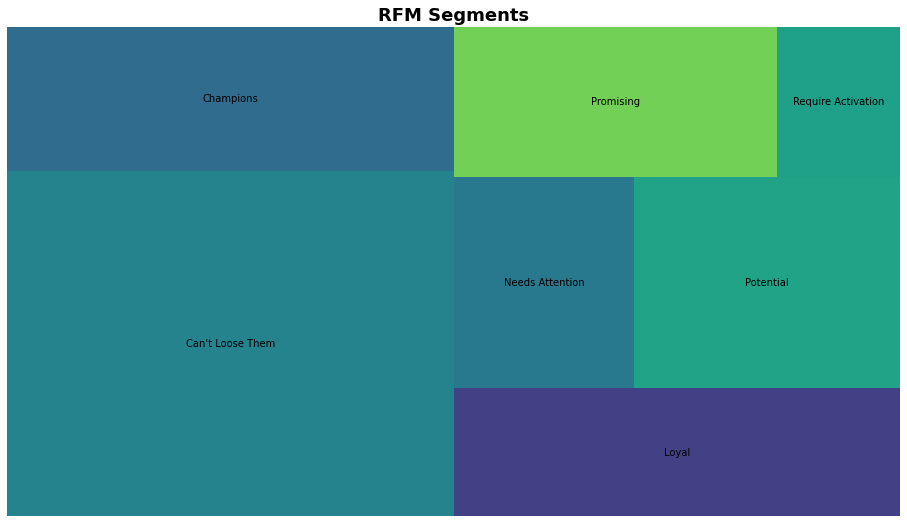

In [ ]:
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=["Can't Loose Them",
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=1)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# Customer Segmentation Using K Means Clustering

In [ ]:
rfm_rfm = rfmTable[['Recency','Frequency','Monetary_Value']]
print(rfm_rfm.describe())

          Recency   Frequency  Monetary_Value
count  972.000000  972.000000      972.000000
mean   357.933128   32.042181      704.092356
std     12.001401   42.327341     1516.583734
min    334.000000    1.000000       12.450000
25%    354.000000   10.000000      203.250000
50%    360.000000   19.000000      341.210000
75%    367.000000   39.000000      657.142500
max    373.000000  682.000000    27834.610000


As we saw the Mean and Variances are differing so we need to apply Data Normalisation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

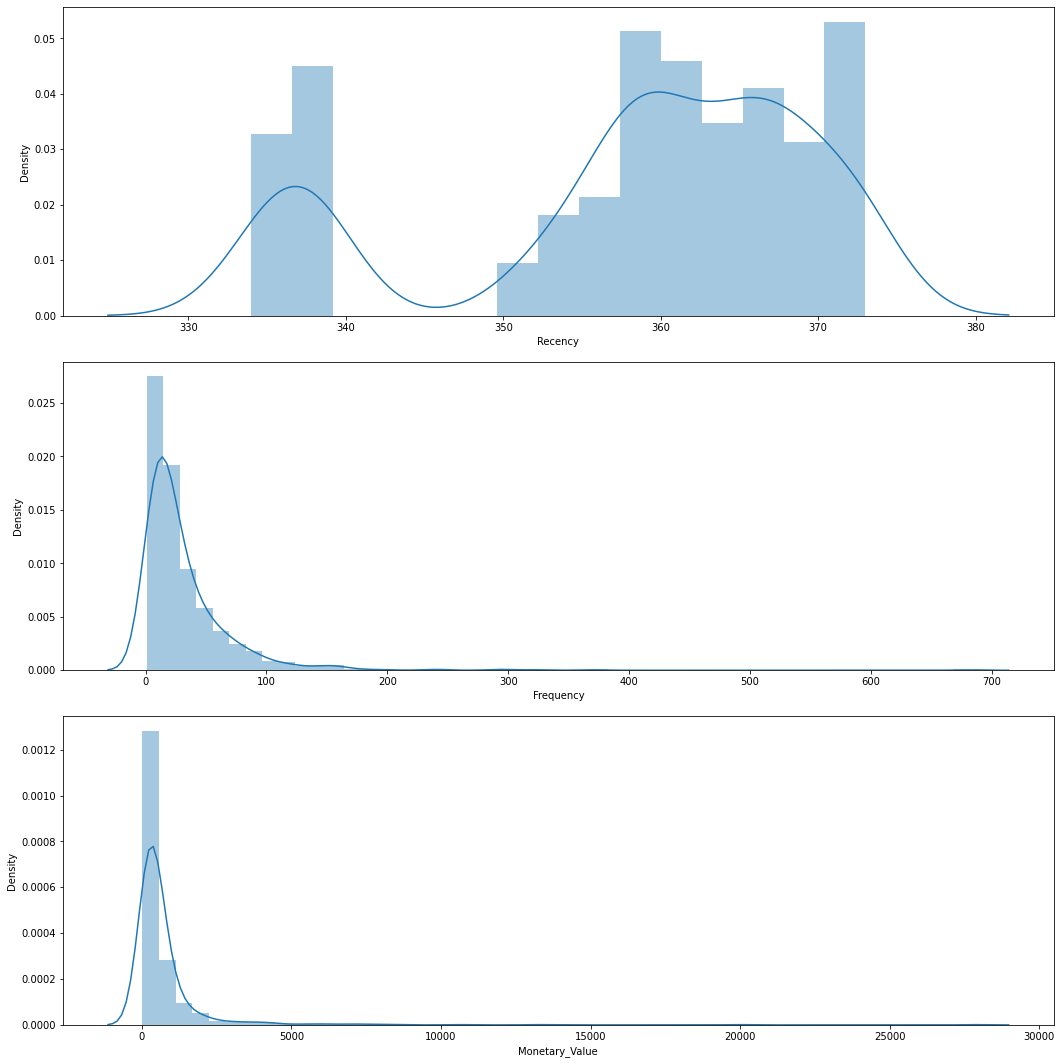

In [ ]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfmTable.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfmTable.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfmTable.Monetary_Value, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

Unsymmetric Distribution of Data - We have to apply Square Root Transformation and verify the Distribution again

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

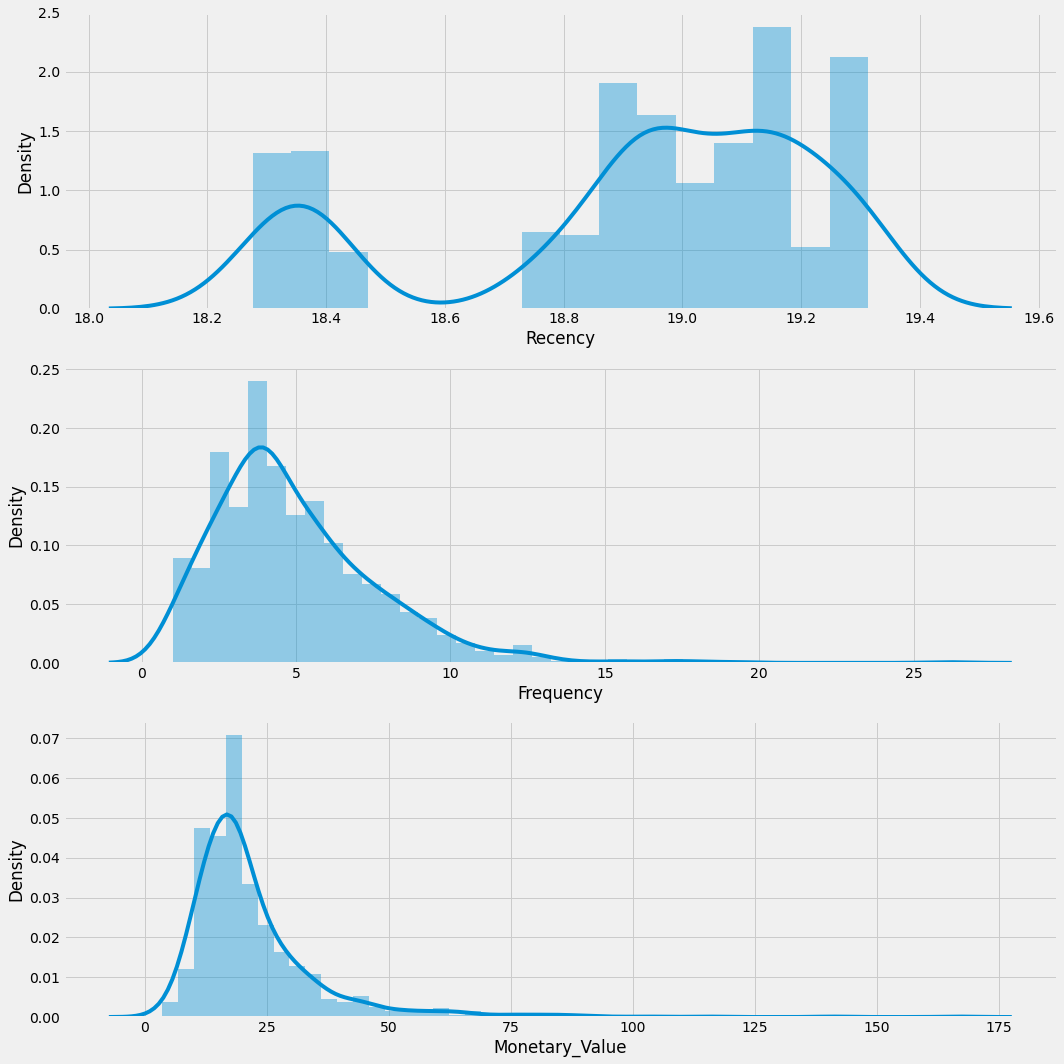

In [ ]:
rfm_sqrt = rfmTable[['Recency', 'Frequency', 'Monetary_Value']].apply(np.sqrt, axis = 1).round(3)


f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfm_sqrt.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_sqrt.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_sqrt.Monetary_Value, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [ ]:
rfm_sqrt.skew()

Recency          -0.826825
Frequency         1.590764
Monetary_Value    3.506900
dtype: float64

# **Implementation of K Means Clustering**

Steps :
    1. Preprocessing the Data
    2. Determine the Number of Clusters
    3. Running K Means Clustering on the Preprocessed Data
    4. Analyse average RFM Values of each Cluster

# Preprocessing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler  

In [ ]:
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_sqrt)
rfm_normalized.shape

(972, 3)

# **Choosing the Number of Clusters**

# Elbow Method

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
inertia = []
kr = range(1,8)
for k in kr:
    km = KMeans(n_clusters = k,random_state=1)
    km.fit(rfm_normalized)
    inertia.append(km.inertia_)

In [ ]:
print (inertia)

[2916.0, 1861.5950943530534, 1388.9748958344417, 1057.3197701774343, 926.5876942937406, 828.480614612896, 742.2290188578248]


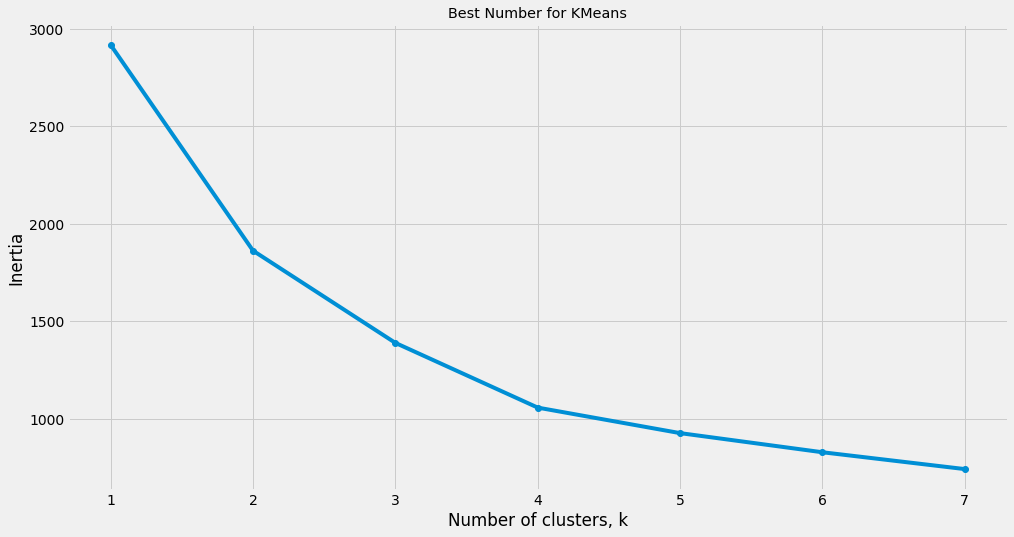

In [ ]:
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Best Number for KMeans')
plt.show()

We choose number of Clusters 3

In [ ]:
# clustering
kc = KMeans(n_clusters=3,random_state=1)
kc.fit(rfm_normalized)


KMeans(n_clusters=3, random_state=1)

In [ ]:
# Assign the clusters to datamart
rfmTable['K_Cluster'] = kc.labels_
rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12347,367,31,711.79,2,3,4,234,9,Can't Loose Them,0
12348,358,17,892.80,3,2,4,324,9,Can't Loose Them,0
12370,357,91,1868.02,3,4,4,344,11,Can't Loose Them,2
12377,354,43,1001.52,4,4,4,444,12,Can't Loose Them,0
12383,352,37,600.72,4,3,3,433,10,Can't Loose Them,0


[]

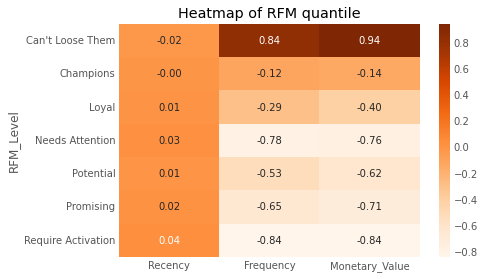

In [ ]:
# the mean value in total 
total_avg = rfmTable.iloc[:, 0:3].mean()
total_avg
# calculate the proportional gap with total mean
cluster_avg = rfmTable.groupby('RFM_Level').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
# heatmap with RFM
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()

[]

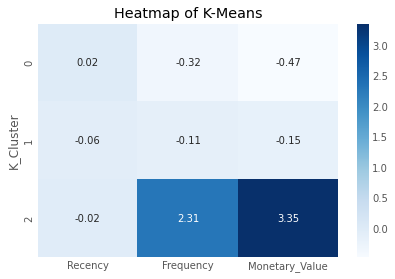

In [ ]:
# calculate the proportional gap with total mean
cluster_avg_K = rfmTable.groupby('K_Cluster').mean().iloc[:, 0:3]
prop_rfm_K = cluster_avg_K/total_avg - 1
# heatmap with K-means
sns.heatmap(prop_rfm_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()